# Data Science Environment Setup & Library Introduction

This notebook guides you through setting up a Python virtual environment and introduces key data science libraries.

**Note:** Run these commands in your terminal (not in Jupyter):

```bash
python -m venv .venv

source .venv/bin/activate

.venv/Source/activate.bat

pip install numpy pandas matplotlib seaborn scikit-learn jupyter kaggle

jupyter notebook
```

If you install the Jupyter extension in VSCode you dont need that last command

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

# Visualization Parameters
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [45]:
data = pd.read_csv('wdbc.data', header=None)

feature_names = [
    'radius', 'texture', 'perimeter', 'area', 'smoothness',
    'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension'
]

column_names = ['id', 'diagnosis'] + \
               [f'{feat}_mean' for feat in feature_names] + \
               [f'{feat}_se' for feat in feature_names] + \
               [f'{feat}_worst' for feat in feature_names]

data.columns = column_names

print(f"Dataset shape: {data.shape}")
print(f"\nFirst few rows:")
data.head()

Dataset shape: (574, 32)

First few rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
diagnosis_df = data[['id', 'diagnosis']]
y = data['diagnosis'].map({"M": 0, "B": 1}).to_numpy()  # 0 = Malignant, 1 = Benign
X = data.iloc[:, 2:].to_numpy()

print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"\nLabel distribution:")
print(f"Malignant (0): {np.sum(y == 0)} ({np.sum(y == 0) / len(y) * 100:.2f}%)")
print(f"Benign (1): {np.sum(y == 1)} ({np.sum(y == 1) / len(y) * 100:.2f}%)")

Feature matrix shape: (574, 30)
Labels shape: (574,)

Label distribution:
Malignant (0): 217 (37.80%)
Benign (1): 357 (62.20%)


In [47]:
df = data.copy()

print("Dataset Information:")
df.info()

print("Missing values:")
print(df.isnull().sum().sum())

print("\nDescriptive Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       574 non-null    int64  
 1   diagnosis                574 non-null    object 
 2   radius_mean              574 non-null    float64
 3   texture_mean             573 non-null    float64
 4   perimeter_mean           573 non-null    float64
 5   area_mean                574 non-null    float64
 6   smoothness_mean          573 non-null    float64
 7   compactness_mean         573 non-null    float64
 8   concavity_mean           574 non-null    float64
 9   concave_points_mean      574 non-null    float64
 10  symmetry_mean            574 non-null    float64
 11  fractal_dimension_mean   574 non-null    float64
 12  radius_se                574 non-null    float64
 13  texture_se               574 non-null    float64
 14  perim

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.740000e+02,574.000000,573.000000,573.000000,574.000000,573.000000,573.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,573.000000,573.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,573.000000
mean,3.055256e+07,14.133152,19.318883,91.947190,655.606446,0.096315,0.104458,0.088907,0.048982,0.181210,0.062784,0.405892,1.215422,2.871226,40.413794,0.007030,0.025428,0.031851,0.011787,0.020478,0.003794,16.284643,25.694930,107.368031,882.445819,0.132317,0.254032,0.272271,0.114756,0.290204,0.083928
std,1.245479e+08,3.530855,4.308125,24.339074,352.043049,0.014203,0.052701,0.079587,0.038737,0.027642,0.007080,0.276585,0.549930,2.016221,45.368166,0.002994,0.017880,0.030099,0.006167,0.008279,0.002640,4.843937,6.138202,33.675213,569.943368,0.022867,0.157065,0.208183,0.065779,0.062062,0.018046
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.000000,0.000000,0.000000,0.004660,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.000000,0.000000,0.000000,0.156500,0.055040
25%,8.691325e+05,11.702500,16.180000,75.170000,420.300000,0.086050,0.065260,0.029565,0.020323,0.161900,0.057682,0.233575,0.831650,1.612500,17.860000,0.005161,0.013097,0.015093,0.007646,0.015010,0.002248,13.015000,21.085000,84.122500,515.425000,0.116600,0.147325,0.114975,0.064943,0.250425,0.071270
50%,9.061570e+05,13.375000,18.890000,86.240000,551.400000,0.095860,0.094450,0.061680,0.033770,0.179200,0.061485,0.325800,1.108000,2.303000,24.610000,0.006374,0.020435,0.025875,0.010950,0.018700,0.003187,14.970000,25.445000,97.665000,686.550000,0.131300,0.214850,0.229000,0.100550,0.282250,0.080040
75%,8.897864e+06,15.977500,21.810000,104.300000,792.025000,0.105300,0.130400,0.130350,0.074030,0.195675,0.066120,0.478375,1.472500,3.366000,45.395000,0.008120,0.032372,0.042252,0.014710,0.023370,0.004558,18.937500,29.832500,126.200000,1093.250000,0.146000,0.337000,0.382400,0.162225,0.317825,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# this is where we clean the data


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perim

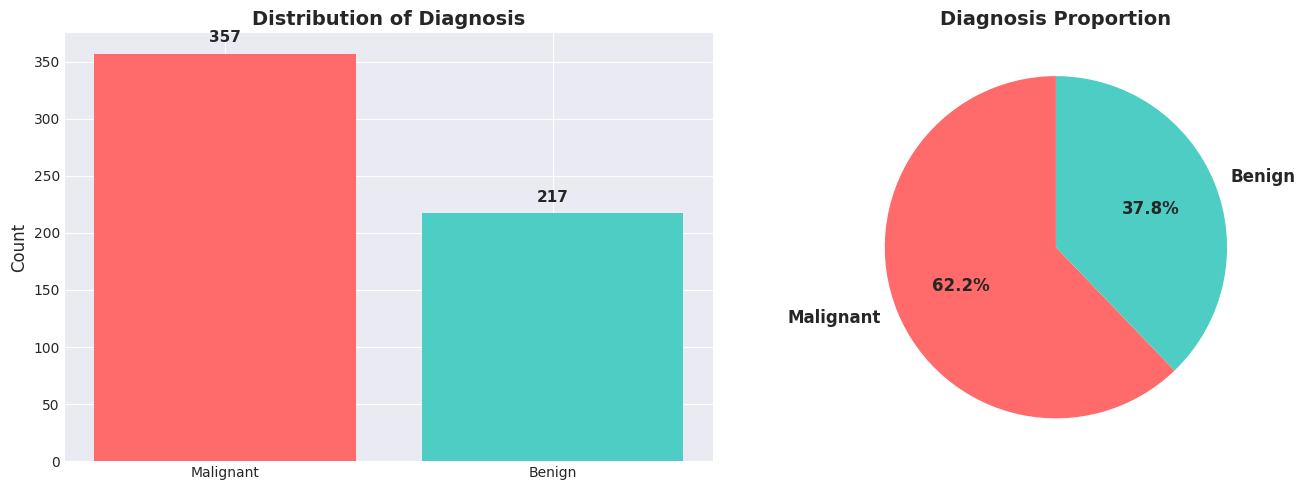

In [49]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
diagnosis_counts = df['diagnosis'].value_counts()
axes[0].bar(['Malignant', 'Benign'], diagnosis_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Diagnosis', fontsize=14, fontweight='bold')
for i, v in enumerate(diagnosis_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#ff6b6b', '#4ecdc4']
axes[1].pie(diagnosis_counts.values, labels=['Malignant', 'Benign'], 
            autopct='%1.1f%%', colors=colors, startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Diagnosis Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

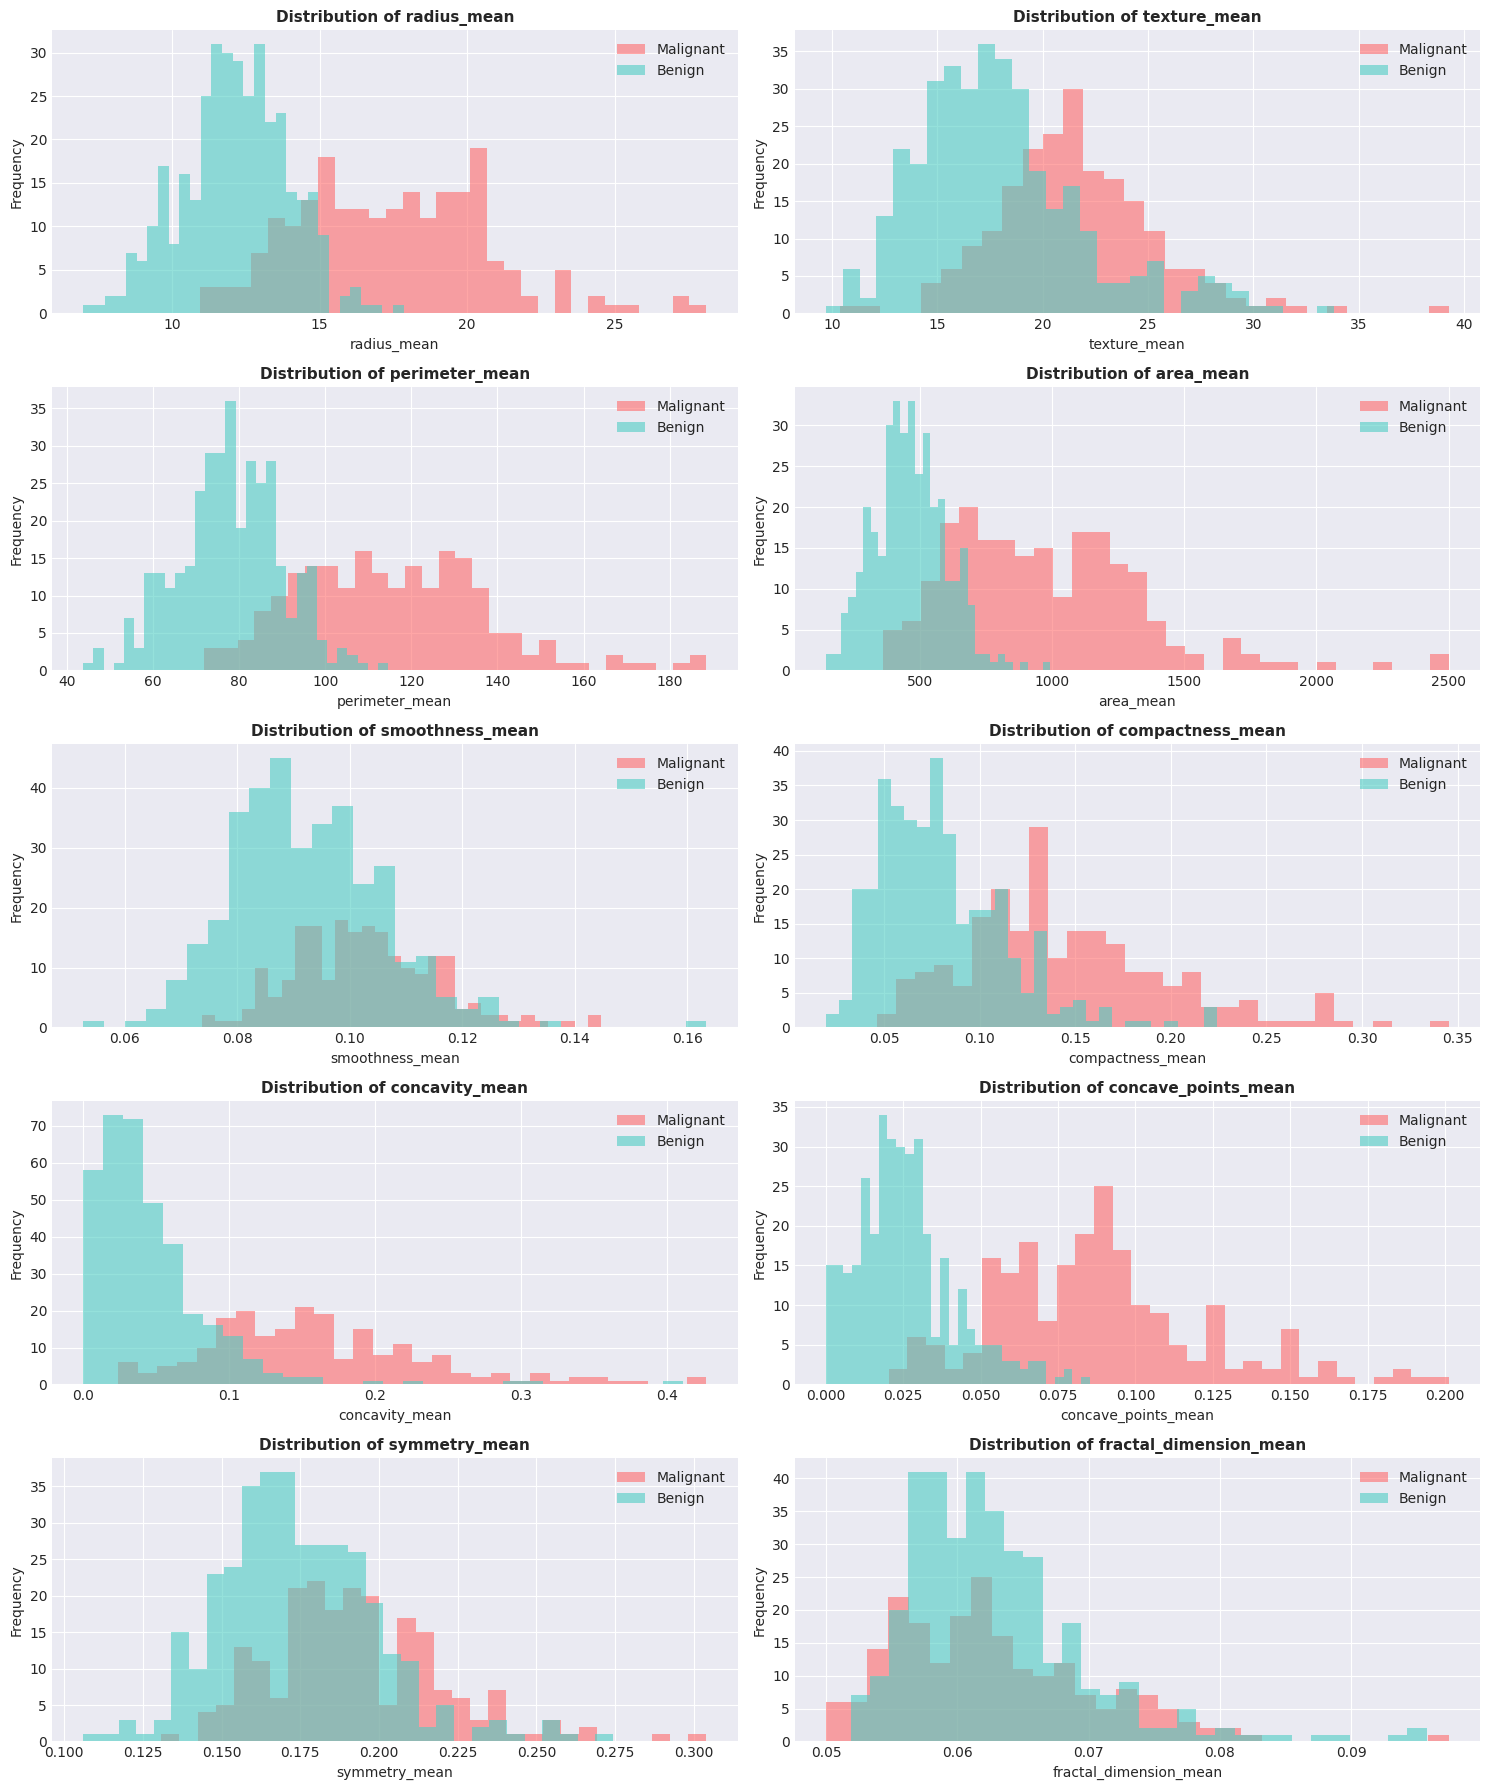

In [6]:
# Analyze mean features
mean_features = [col for col in df.columns if '_mean' in col]

# Distribution plots for mean features
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    # Separate by diagnosis
    malignant = df[df['diagnosis'] == 'M'][col]
    benign = df[df['diagnosis'] == 'B'][col]
    
    axes[idx].hist(malignant, bins=30, alpha=0.6, label='Malignant', color='#ff6b6b')
    axes[idx].hist(benign, bins=30, alpha=0.6, label='Benign', color='#4ecdc4')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend()
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

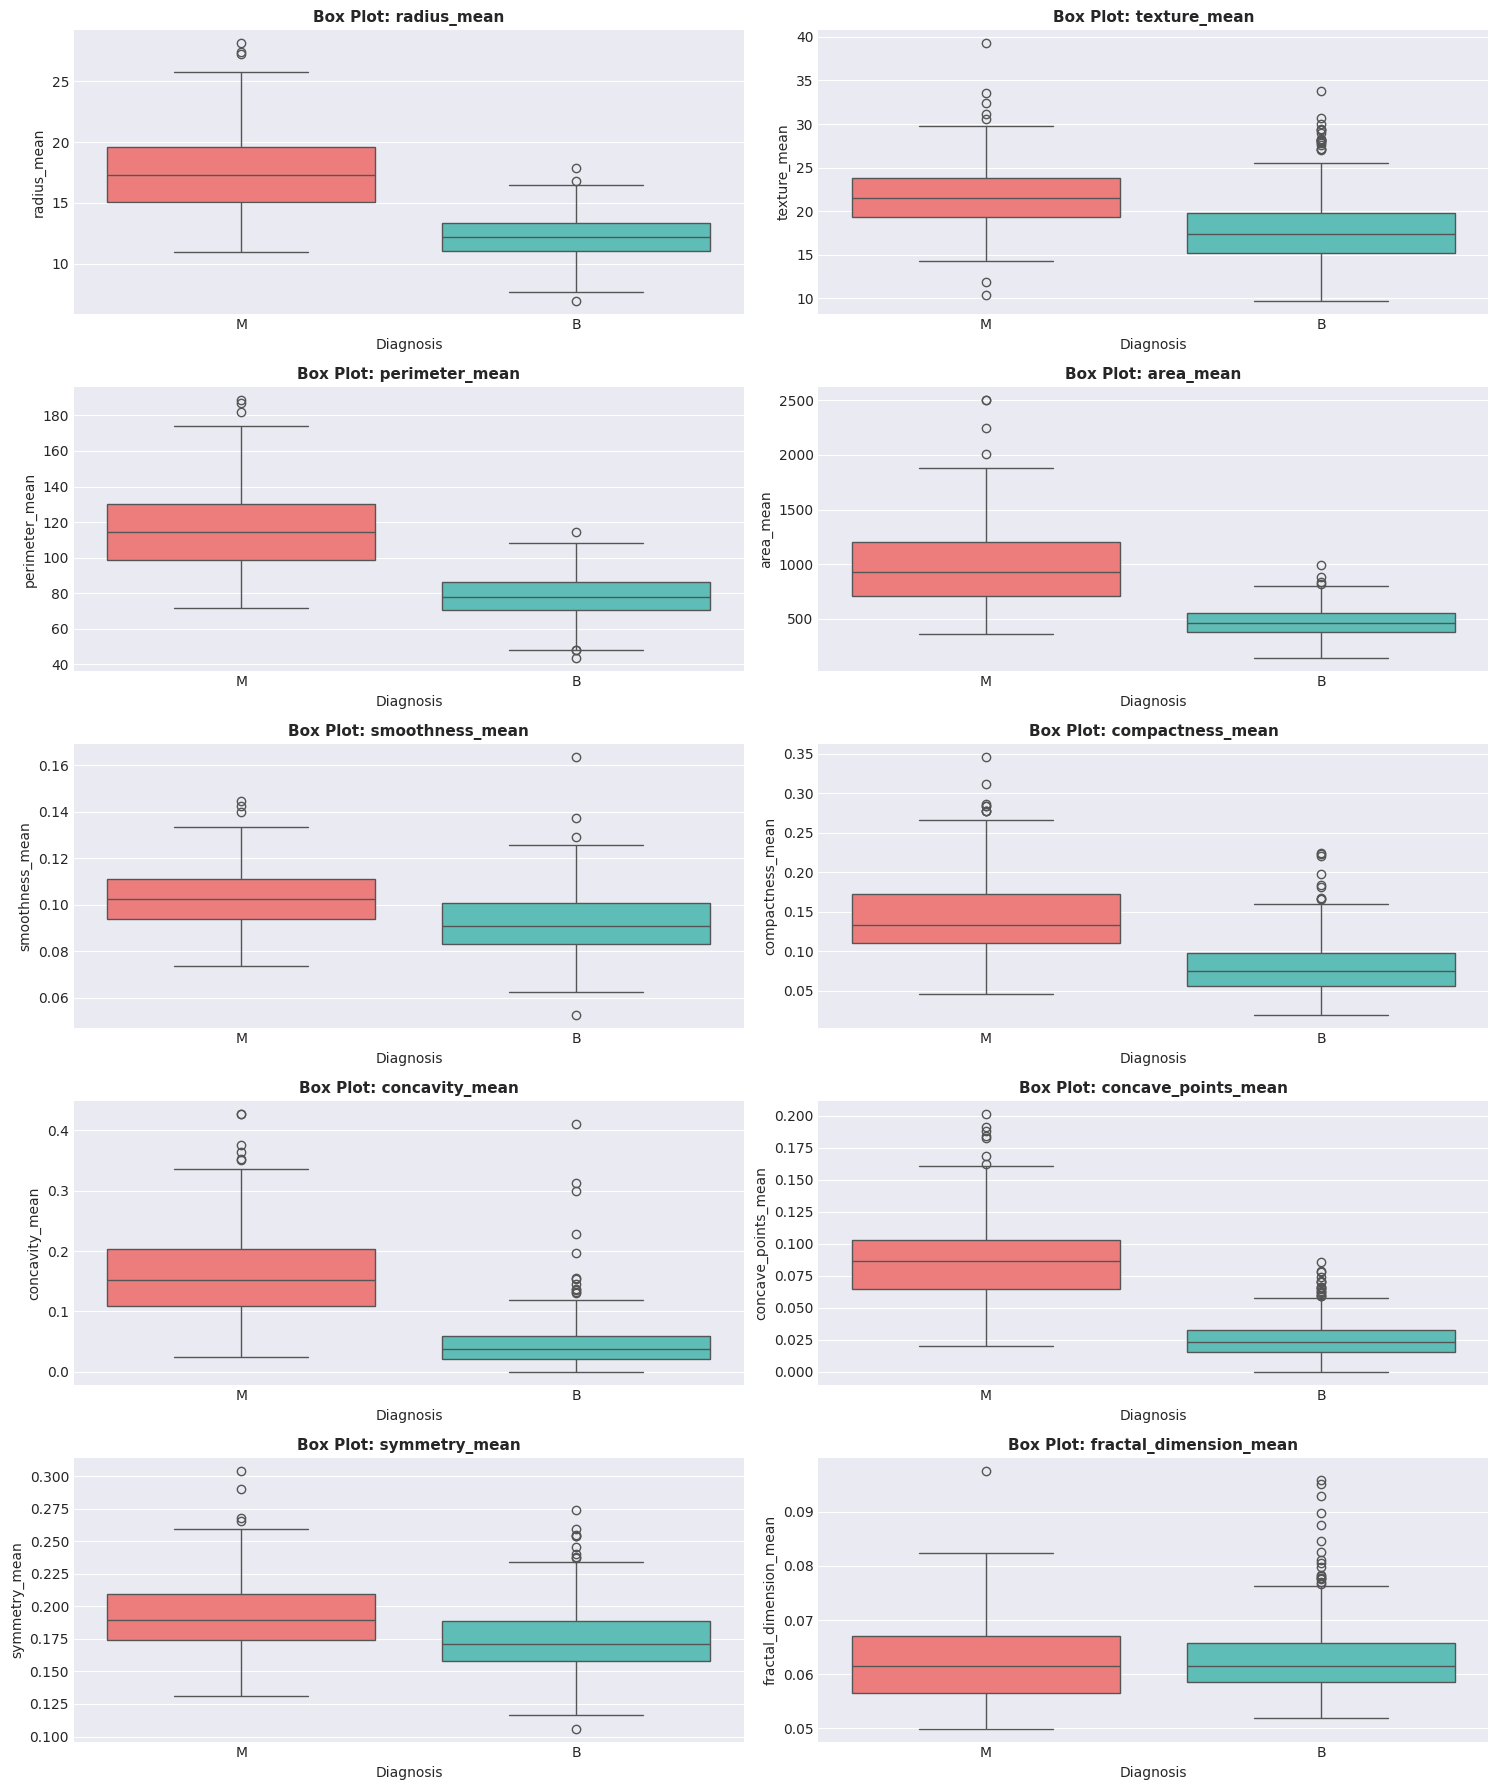

In [7]:
# Box plots for mean features
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[idx], 
                palette={'M': '#ff6b6b', 'B': '#4ecdc4'})
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Diagnosis', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

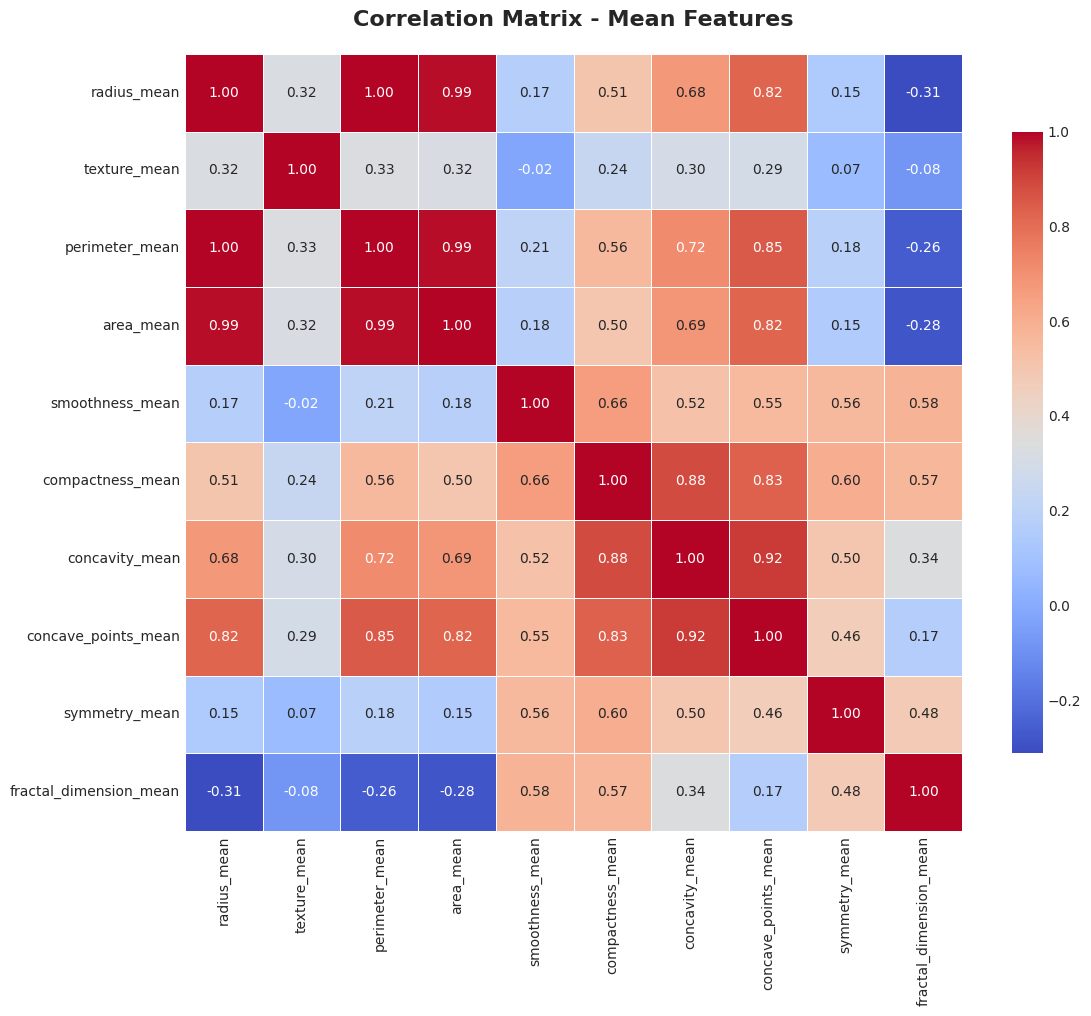

In [8]:
# Correlation matrix for mean features
mean_df = df[mean_features]
correlation_matrix = mean_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Mean Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [9]:
# Find highly correlated feature pairs
threshold = 0.85
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"\nHighly correlated feature pairs (|correlation| > {threshold}):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")


Highly correlated feature pairs (|correlation| > 0.85):
radius_mean <-> perimeter_mean: 0.998
radius_mean <-> area_mean: 0.987
perimeter_mean <-> area_mean: 0.987
perimeter_mean <-> concave_points_mean: 0.851
compactness_mean <-> concavity_mean: 0.883
concavity_mean <-> concave_points_mean: 0.921


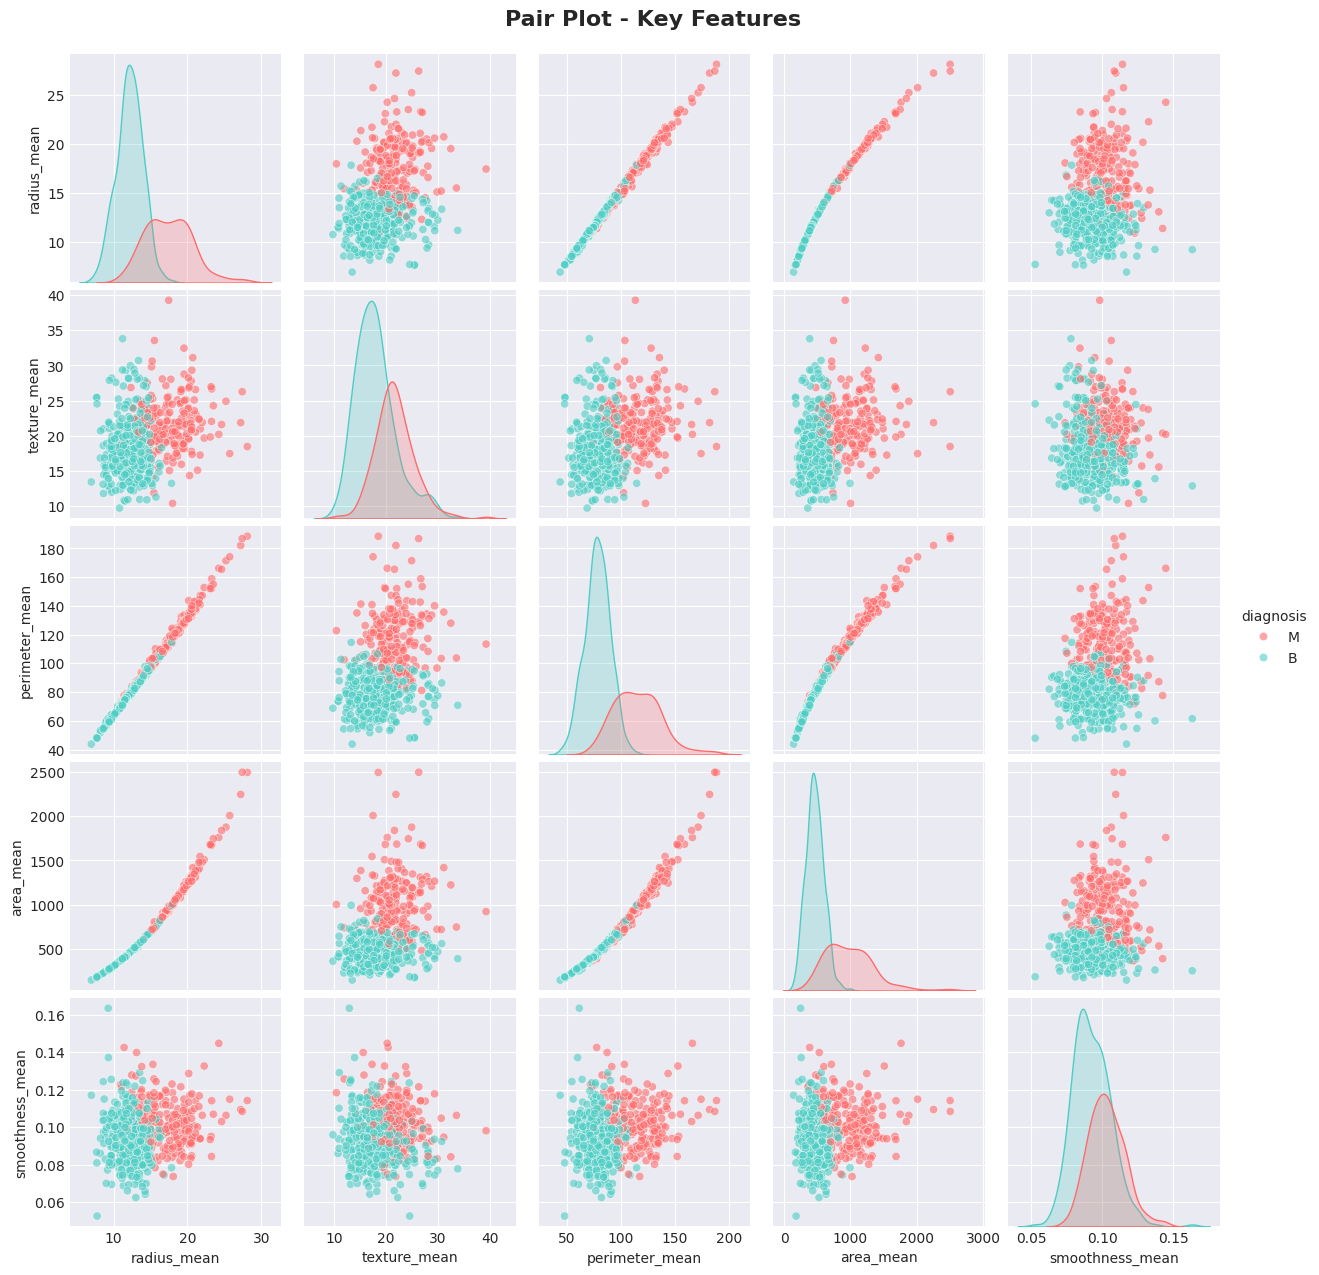

In [10]:
# Select key features for pair plot
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
pair_df = df[key_features + ['diagnosis']].copy()

# Create pair plot
sns.pairplot(pair_df, hue='diagnosis', palette={'M': '#ff6b6b', 'B': '#4ecdc4'},
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pair Plot - Key Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# Scale features


Total variance: 0.6229

Top 10 features by variance:
                 Feature  Variance
27  concave_points_worst  0.050934
7    concave_points_mean  0.037128
6         concavity_mean  0.034827
20          radius_worst  0.029512
2         perimeter_mean  0.028146
22       perimeter_worst  0.027957
0            radius_mean  0.027769
26       concavity_worst  0.027718
21         texture_worst  0.026787
5       compactness_mean  0.026195


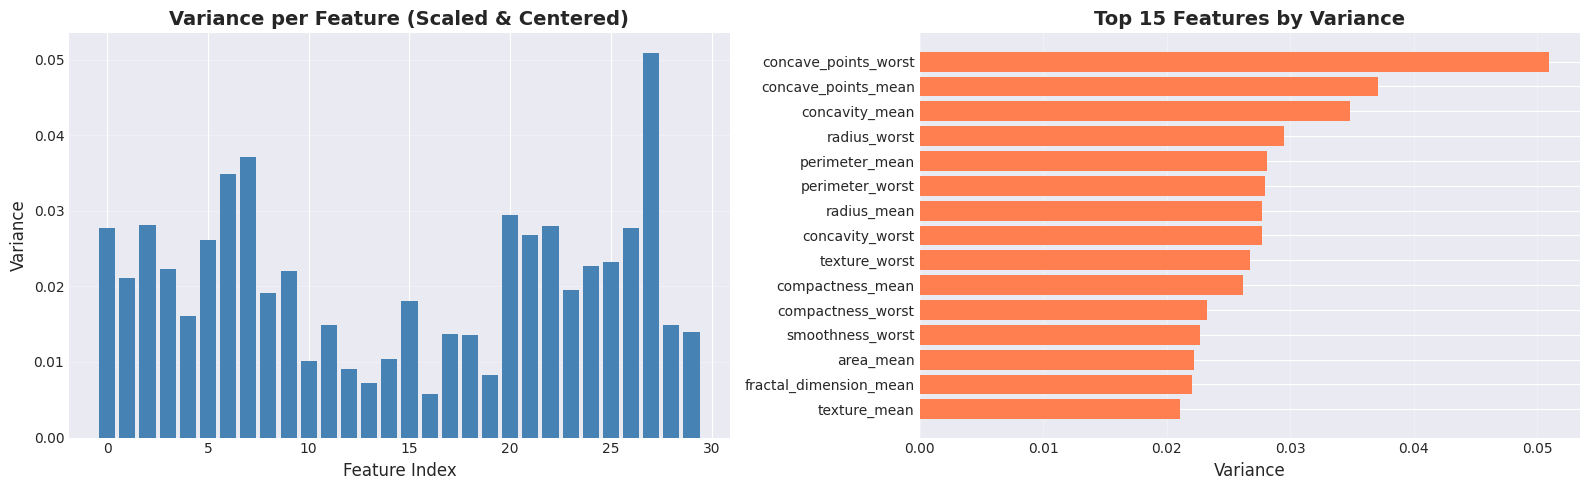

In [12]:
# Visualize variance distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot
axes[0].bar(range(len(variance_per_feature)), variance_per_feature, color='steelblue')
axes[0].set_xlabel('Feature Index', fontsize=12)
axes[0].set_ylabel('Variance', fontsize=12)
axes[0].set_title('Variance per Feature (Scaled & Centered)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Top 15 features
top_15 = variance_df.head(15)
axes[1].barh(range(len(top_15)), top_15['Variance'].values, color='coral')
axes[1].set_yticks(range(len(top_15)))
axes[1].set_yticklabels(top_15['Feature'].values)
axes[1].set_xlabel('Variance', fontsize=12)
axes[1].set_title('Top 15 Features by Variance', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Variance explained by first 5 components: 0.8473
Variance explained by first 10 components: 0.9516

Number of components for 95% variance: 10


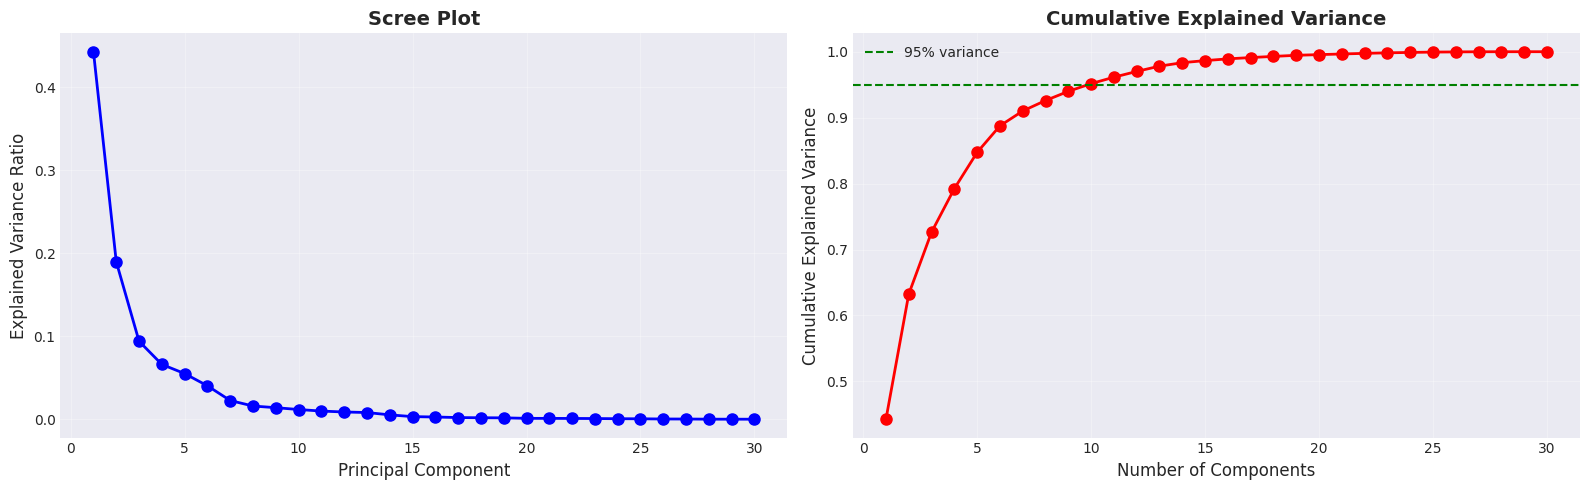

In [14]:
# Visualize PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Scree plot
axes[0].plot(range(1, len(explained_variance_ratio) + 1), 
             explained_variance_ratio, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance) + 1), 
             cumulative_variance, 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95% variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

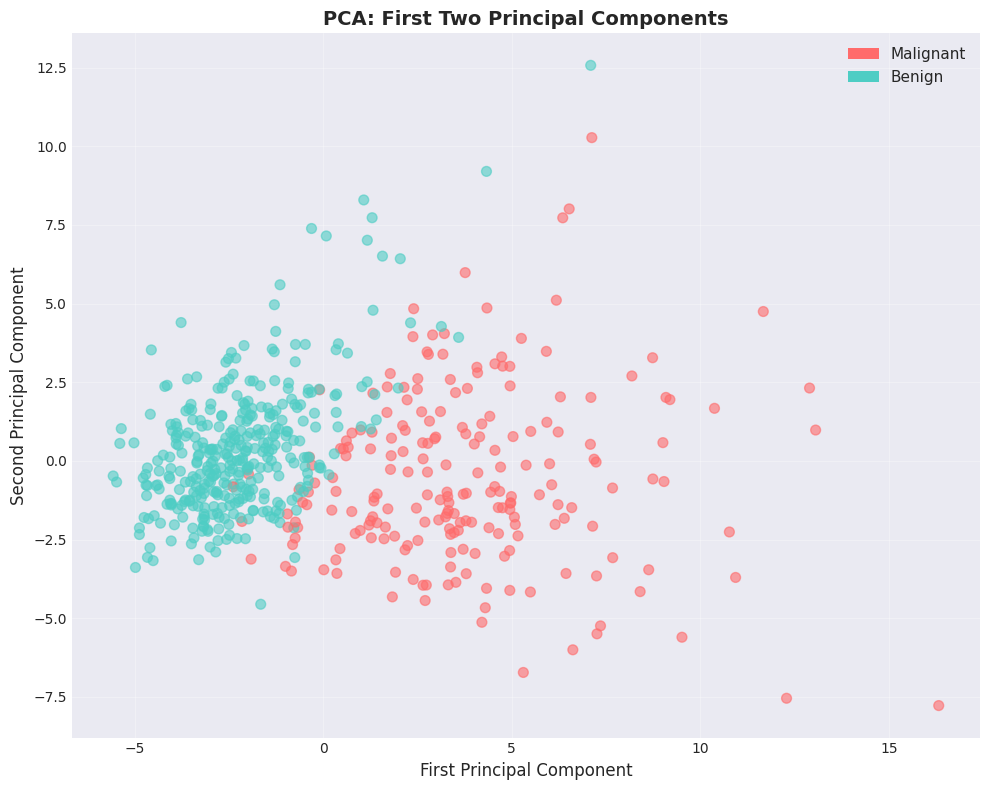

In [15]:
# Visualize first 2 principal components
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b' if label == 0 else '#4ecdc4' for label in y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, s=50)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('PCA: First Two Principal Components', fontsize=14, fontweight='bold')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#ff6b6b', label='Malignant'),
                   Patch(facecolor='#4ecdc4', label='Benign')]
plt.legend(handles=legend_elements, fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()